In [11]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import numba as nb
from numba import jit,njit, prange

In [12]:
xfixed=[]
tarray=[]
def chaos_map(x,r):
    for t in np.arange(0,200):
        x=r*x*(1-x)
        xfixed.append(x)
        tarray.append(t)
    return xfixed, tarray

chaos_map(0.5,3.5)
plt.plot(tarray,xfixed)
plt.title("Chaos Map",fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("t", fontsize=20)
plt.ylabel("x(t)", fontsize=20)

In [13]:
rarray = []
xarray = []

def logistic(x):
    for r in np.arange(2.8,4,.01):
        for t in nb.prange(2000):
            x=r*x*(1-x)
            rarray.append(r)
            xarray.append(x)

In [14]:
logistic(0.5)

print(rarray[-1])
print(xarray[1])

Text(0, 0.5, 'x')

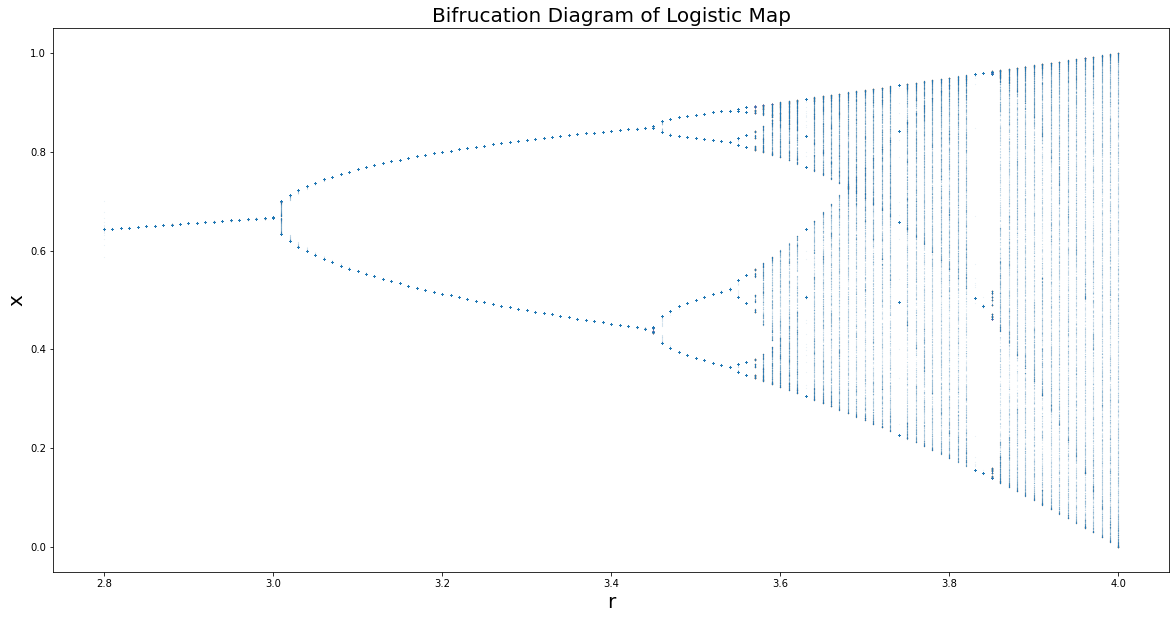

In [15]:
plt.title("Bifrucation Diagram of Logistic Map",fontsize=20)
plt.scatter(rarray,xarray,marker='o',s=0.001,alpha=1)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("r", fontsize=20)
plt.ylabel("x", fontsize=20)

Text(0, 0.5, 'x')

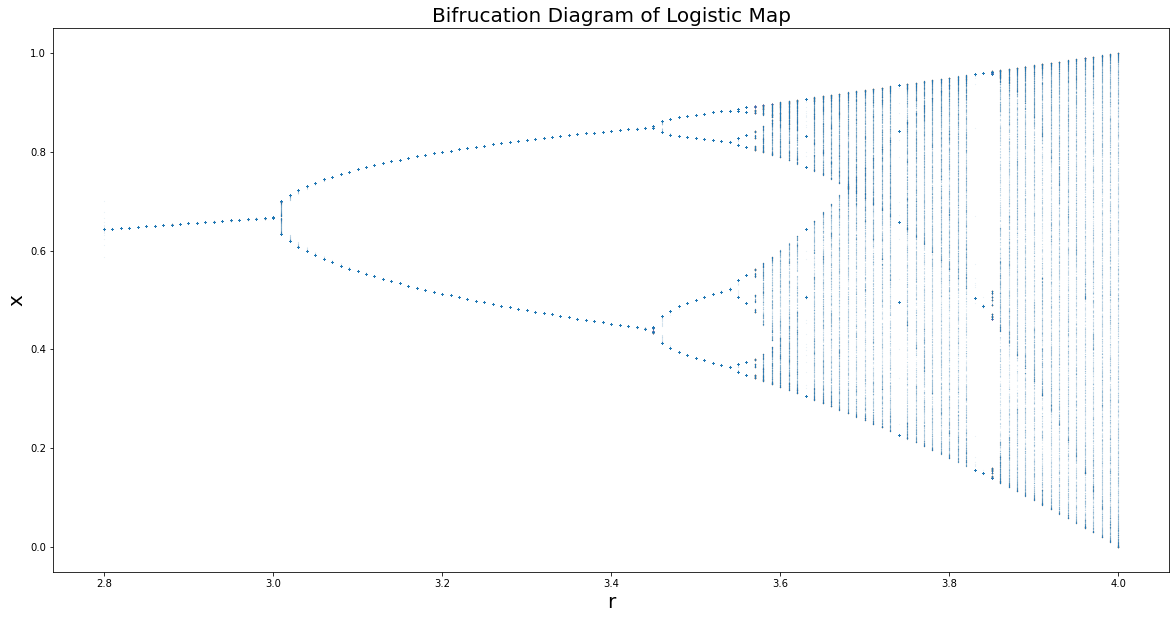

In [16]:
plt.title("Bifrucation Diagram of Logistic Map",fontsize=20)
plt.scatter(rarray,xarray,marker='o',s=0.001,alpha=1)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("r", fontsize=20)
plt.ylabel("x", fontsize=20)


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1440x720', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp5mrtldn5/temp.m4v']' returned non-zero exit status 255.

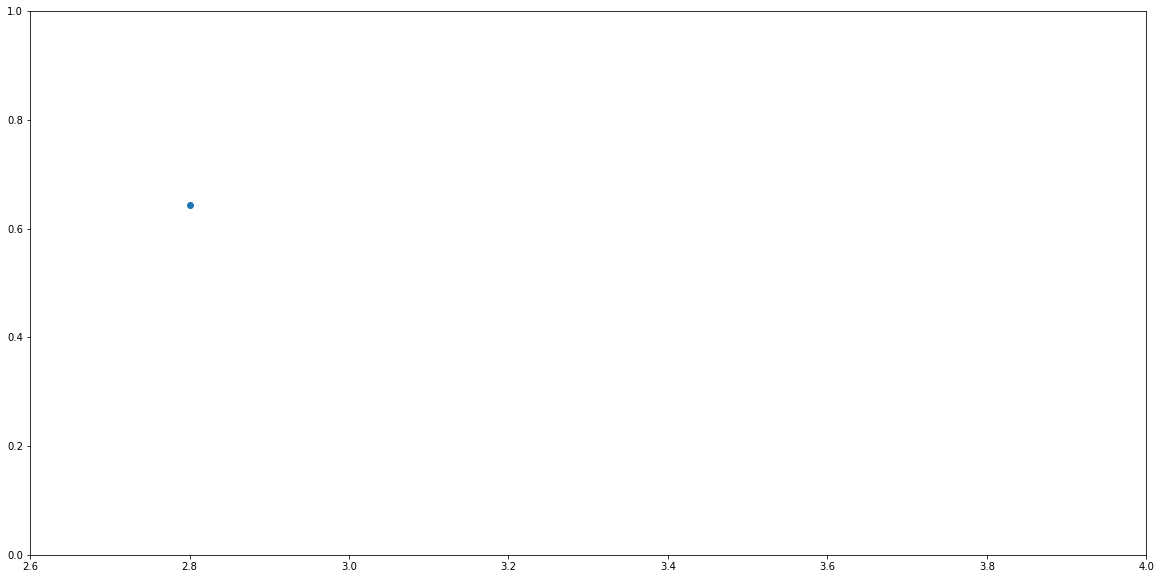

In [17]:
from IPython import display
import matplotlib.animation as ani

fig, ax = plt.subplots()
#line, = ax.plot([],[],zorder=4)
scat = ax.scatter([],[],zorder=4)


plt.xlim(2.6,4)
plt.ylim(0,1)

def animate(i):
    #line.set_data(rarray[:i],xarray[:i])
    scat.set_offsets((rarray[i],xarray[i]))
   
    return scat, #line,

#ani = FuncAnimation(fig, animate_func, interval=100, frames=N)
ani = ani.FuncAnimation(fig, animate, frames=1000, interval = 20,blit=False)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
len(rarray)/1000

In [22]:
x_init = 0.5
N = 2000
r = np.arange(2.4, 4., .001)

@jit(nopython=True, parallel = True)
def numba_logistic(x0,r):
    x = np.full_like(r,x0)
    #print(x)
    for n in prange(1000):
        x = x * r * (1-x)
        
    final_list = np.empty((N + 1, r.shape[0]), dtype=np.float64)
    final_list[0,:] = x
    for n in prange(1,N + 1):
        final_list[n,:] = final_list[n-1] * r * (1 - final_list[n-1])
    out = np.empty_like(final_list)
    for n in prange(r.shape[0]):
        out[:,n] = np.sort(final_list[:,n])
        
    return out

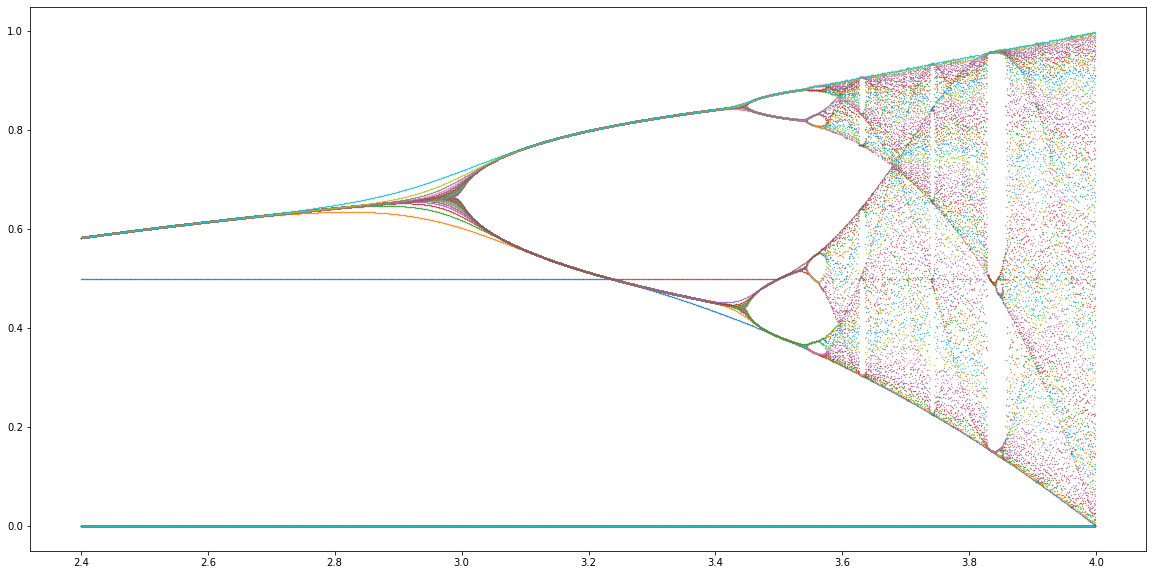

In [23]:
plt.rcParams["figure.figsize"] = (20,10)

numba_logistic(x_init,r)
for i in prange(N):
    if i % 5 == 0:
        plt.scatter(r,numba_logistic(x_init,r)[i], s = 0.1)